<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Bivariate Analysis

### Initializations

In [4]:
# Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [7]:
df = pd.read_pickle('exchange/hr_01_cleaned_train.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 10 columns):
satisfactionLevel       11999 non-null float64
yearsSinceEvaluation    11999 non-null float64
numberOfProjects        11999 non-null int64
averageMonthlyHours     11999 non-null int64
yearsAtCompany          11999 non-null int64
workAccident            11999 non-null category
hasLeftCompany          11999 non-null category
gotPromotion            11999 non-null category
department              11999 non-null category
salary                  11999 non-null category
dtypes: category(5), float64(2), int64(3)
memory usage: 527.5 KB


### Category Attributes vs. Has Left Company

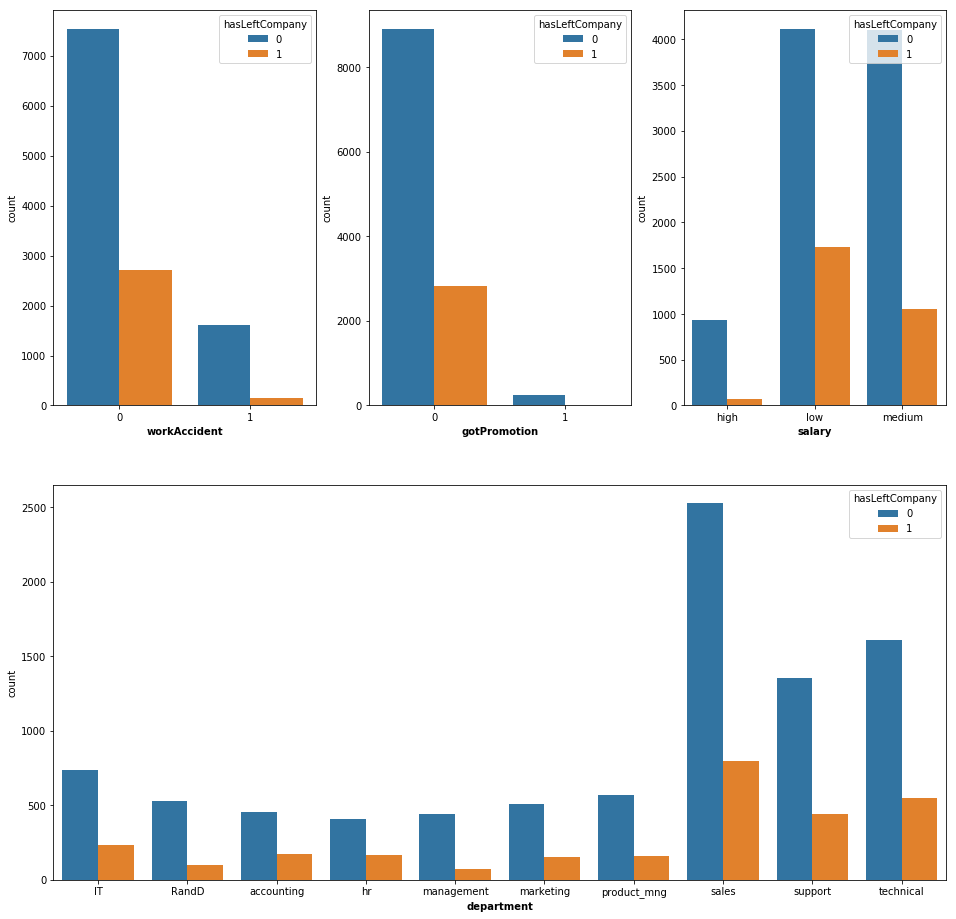

In [42]:
# Visualisierung des Zusammenhangs der Attribute mit Categories gegenüber dem Verlassen der Firma
count_number_colums = df.select_dtypes(include=['category']).columns.size - 1
f, a = plt.subplots(2, 3, figsize=(16,16))
a = a.ravel()
for idx, col in enumerate(df.select_dtypes(include=['category']).drop(['department', 'hasLeftCompany'], axis=1)):
    sns.countplot(x=col, hue='hasLeftCompany', data=df, ax=a[idx])
    a[idx].set_xlabel(col, weight='bold')
a = plt.subplot2grid((2, 3), (1, 0), colspan=3)
a.set_xlabel(col, weight='bold')
sns.countplot(x='department', hue='hasLeftCompany', data=df, ax=a);

### Number Attributes vs. Has Left Company

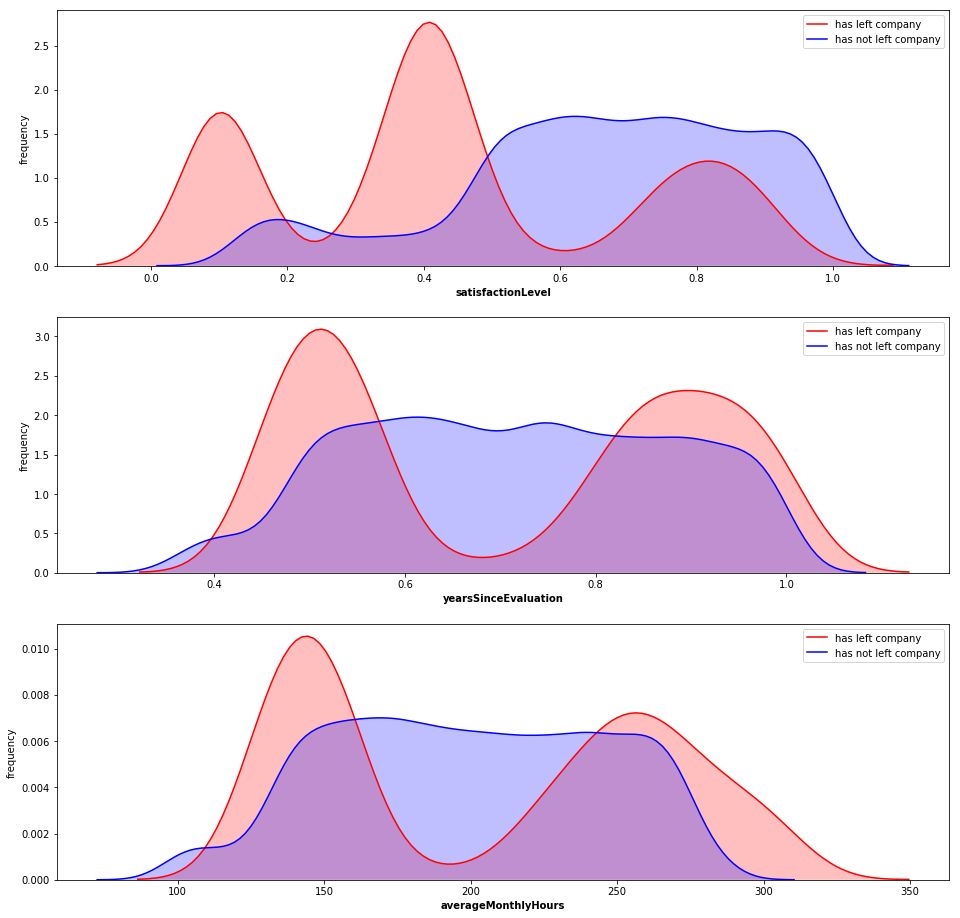

In [46]:
# Visualisierung des Zusammenhangs von satisfaction, evaluation, monthlyHours gegenüber dem Verlassen der Firma
f, a = plt.subplots(3, 1, figsize=(16,16))
a = a.ravel()
for idx, col in enumerate(['satisfactionLevel', 'yearsSinceEvaluation', 'averageMonthlyHours']):
    sns.kdeplot(df.loc[(df['hasLeftCompany'] == 1), col], color='r', shade=True, label='has left company', ax=a[idx])
    sns.kdeplot(df.loc[(df['hasLeftCompany'] == 0), col], color='b', shade=True, label='has not left company', ax=a[idx])
    a[idx].set(ylabel='frequency')
    a[idx].set_xlabel(col, weight='bold')
    

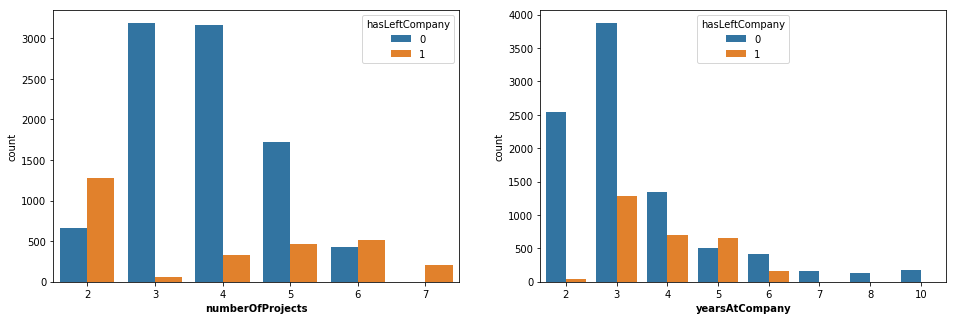

In [48]:
# Visualisierung des Zusammenhangs von numberProject und yearsAtCompany gegenüber dem Verlassen der Firma
f, a = plt.subplots(1, 2, figsize=(16,5))
a = a.ravel()
for idx, col in enumerate(['numberOfProjects', 'yearsAtCompany']):
    sns.countplot(x=col, hue='hasLeftCompany', data=df, ax=a[idx])
    a[idx].set_xlabel(col, weight='bold')